In [4]:
source("_targets.R")
library(dplyr)
library(egg)
library(ggnewscale)
library(ggplot2)
library(ggrastr)
library(grid)
library(gtable)
library(mclust)
library(scales)
library(Seurat)
library(withr)

In [5]:
theme_set(
  theme_bw() +
    theme(
      axis.text = element_text(size = 8),
      axis.title = element_text(size = 8),
      legend.title = element_text(size = 8),
      strip.text = element_text(size = 8, margin = margin(3, 3, 3, 3)),
      strip.background = element_rect(fill = "transparent"),
    )
)

In [6]:
tar_load(acc)
grep("clusters", colnames(acc), val=T)

character(0)

In [7]:
pl <- DimPlot(acc, red = "umap.spca")
colnames(pl$data)

[1] "UMAP_1" "UMAP_2" "ident"

In [8]:
pl <- DimPlot(acc, red = "umap")
colnames(pl$data)

[1] "umap_1" "umap_2" "ident"

In [9]:
acc <- acc %>% acc_add_components_from_umap
acc.cnv <- subset(acc, ident = "ACC")
acc.cnv <- acc.cnv %>% FindNeighbors(red='pca', dims=1:50)

Computing nearest neighbor graph

Computing SNN



In [10]:
names(acc.cnv@graphs)

[1] "RNA.scaled_nn"  "RNA.scaled_snn"

In [11]:
acc <- acc %>% acc_add_components_from_umap
acc.cnv <- subset(acc, ident = "ACC")
DefaultAssay(acc.cnv) <- "RNA.scaled"
acc.cnv <- acc.cnv %>% FindNeighbors(red='pca', dims=1:10) %>% FindClusters(res = 0.8)
acc.cnv$pca_clusters <- acc.cnv$seurat_clusters
DefaultAssay(acc.cnv) <- "RNA"
acc.cnv <- acc.cnv %>% FindNeighbors(red='spca', dims=1:32) %>% FindClusters(res = 0.8)
acc.cnv$spca_clusters <- acc.cnv$seurat_clusters
data <- FetchData(acc.cnv, c("umap_1", "umap_2", "pca_clusters", "UMAP_1", "UMAP_2", "spca_clusters", "individual"))
colnames(data)[c(1, 2, 4, 5)] <- c(
  "UMAP.PCA_1", "UMAP.PCA_2", "UMAP.SPCA_1", "UMAP.SPCA_2"
)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1127
Number of edges: 34573

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7931
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1127
Number of edges: 44601

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7514
Number of communities: 8
Elapsed time: 0 seconds


[1] -1.664222  8.304396


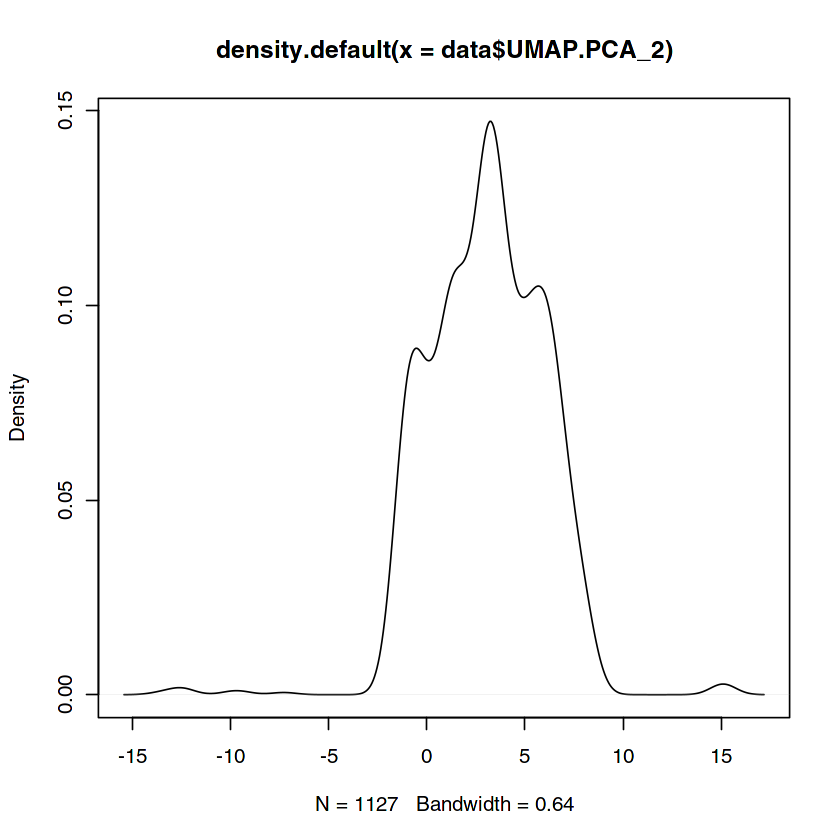

In [12]:
plot(density(data$UMAP.PCA_2))
print(range(data$UMAP.PCA_2 %>% subset(between(., -5, 12))))

In [13]:
adjustedRandIndex(data$pca_clusters, data$spca_clusters)

[1] 0.2894921

In [14]:
adjustedRandIndex(data$pca_clusters, data$individual)

[1] 0.2163266

In [15]:
adjustedRandIndex(data$spca_clusters, data$individual)

[1] 0.1278155

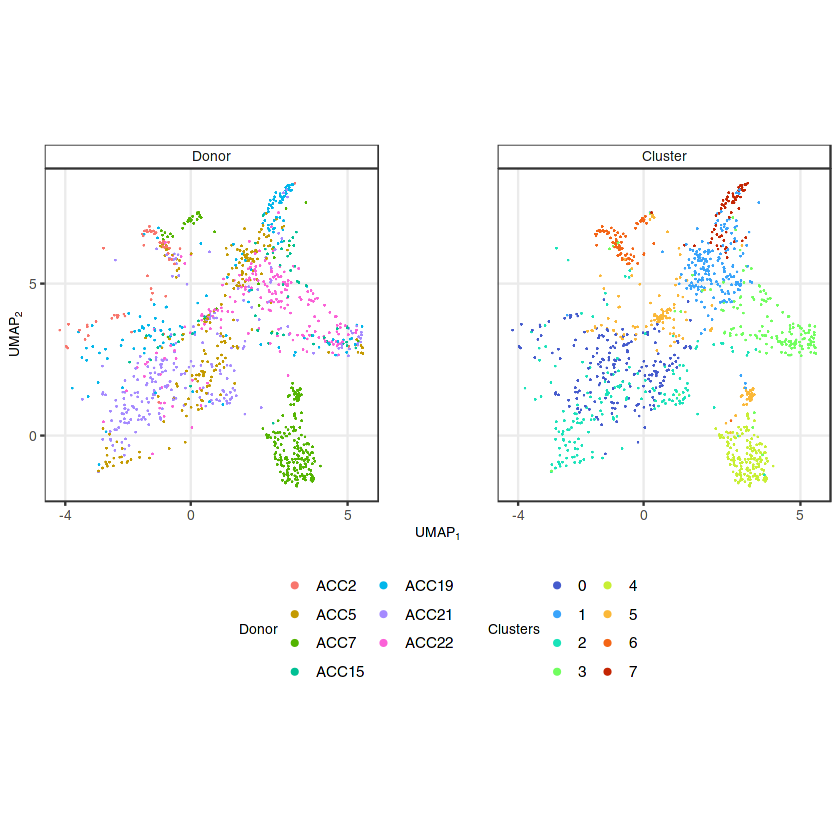

In [24]:
plotorder <- with_seed(0, sample(ncol(acc.cnv)))
pt.size <- 0.75
dpi <- 600
pcaplot <- ggplot(
  tibble(data, UMAP_1 = UMAP.PCA_1, UMAP_2 = UMAP.PCA_2, clusters = pca_clusters, facet = factor("Donor", c("Donor", "Cluster"))) %>%
    dplyr::slice(plotorder) %>%
    subset(between(UMAP_2, -5, 12)),
  aes(UMAP_1, UMAP_2)
) + 
  facet_wrap(vars(facet)) +
  rasterise(
    geom_point(aes(color = individual), \(data) data, stroke=NA, size=pt.size),
    dpi = dpi
  ) +
  scale_color_hue("Donor", guide = guide_legend(order = 1, nrow = 4, override.aes = list(size = 2))) +
  new_scale_color() +
  rasterise(
    geom_point(
      aes(color = clusters),
      data = \(data) data %>% mutate(facet = factor("Cluster", c("Donor", "Cluster"))),
      stroke = NA,
      size = pt.size
    ),
    dpi = dpi
  ) +
  scale_x_continuous(breaks = \(x) union(-4, pretty_breaks(3)(x)), minor_breaks = NULL) +
  scale_y_continuous(breaks = pretty_breaks(3), minor_breaks = NULL) +
  scale_color_viridis_d(
    "Clusters",
    option = "turbo",
    begin = 0.1,
    end = 0.9,
    guide = guide_legend(order = 2, nrow = 4, override.aes = list(size = 2))
  ) +
  labs(
    x = bquote(UMAP[1]),
    y = bquote(UMAP[2])
  ) +
  theme(
    aspect.ratio = 1,
    legend.position = "bottom",
    panel.spacing.x = unit(72, "pt"),
    plot.margin = margin(18, 5.5, 18, 5.5, "pt")
  )
pcaplot

    t  l  b  r  z clip        name
1   1  1 13 13  0   on  background
2   8  5  8  5  1   on   panel-1-1
3   8  9  8  9  1   on   panel-2-1
4   6  5  6  5  3  off  axis-t-1-1
5   6  9  6  9  3  off  axis-t-2-1
6   9  5  9  5  3  off  axis-b-1-1
7   9  9  9  9  3  off  axis-b-2-1
8   8  8  8  8  3  off  axis-l-1-2
9   8  4  8  4  3  off  axis-l-1-1
10  8 10  8 10  3  off  axis-r-1-2
11  8  6  8  6  3  off  axis-r-1-1
12  7  5  7  5  2   on strip-t-1-1
13  7  9  7  9  2   on strip-t-2-1
14  5  5  5  9  4  off      xlab-t
15 10  5 10  9  5  off      xlab-b
16  8  3  8  3  6  off      ylab-l
17  8 11  8 11  7  off      ylab-r
18  4  5  4  9  8  off    subtitle
19  3  5  3  9  9  off       title
20 11  5 11  9 10  off     caption
21  2  2  2  2 11  off         tag
22 14  1 28 13  0   on  background
23 21  5 21  5  1   on   panel-1-1
24 21  9 21  9  1   on   panel-2-1
25 19  5 19  5  3  off  axis-t-1-1
26 19  9 19  9  3  off  axis-t-2-1
27 22  5 22  5  3  off  axis-b-1-1
28 22  9 22  9  3  o

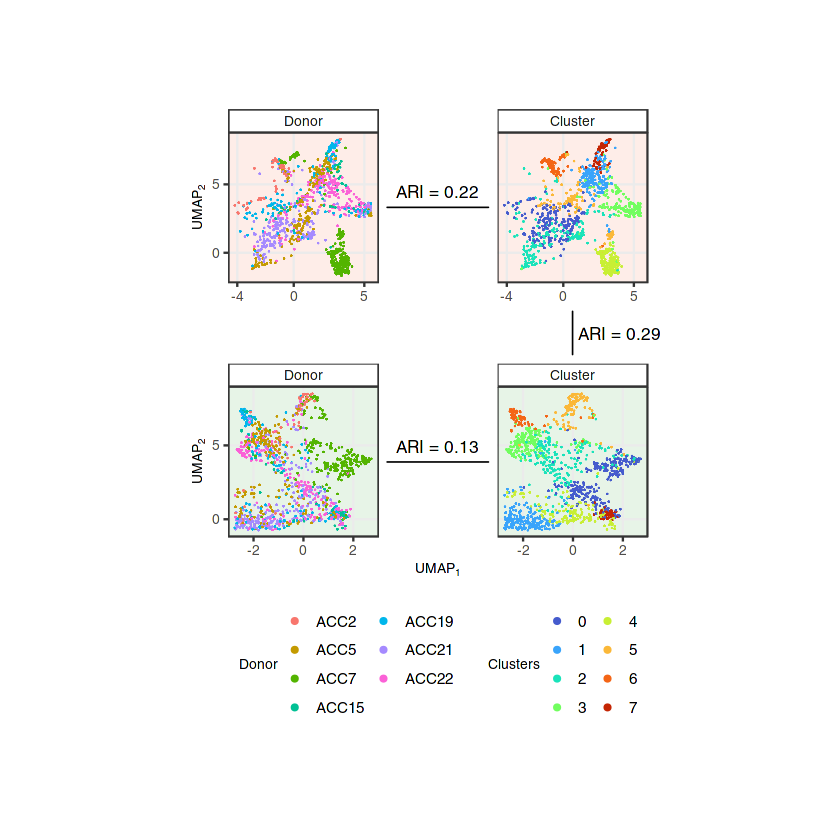

In [25]:
w <- unit(1.25, "in")
h <- unit(1.25, "in")
report <-
  rbind(
    set_panel_size(
      pcaplot +
        labs(x = NULL) +
        theme(
          legend.position = "none",
          panel.background = element_rect(fill = midgut.model.colors.legend["PCA"]),
        ),
      w = w,
      h = h
    ),
    set_panel_size(
      pcaplot %>%
        `$<-`(
          "data",
          value = tibble(data, UMAP_1 = UMAP.SPCA_1, UMAP_2 = UMAP.SPCA_2, clusters = spca_clusters, facet = factor("Donor", c("Donor", "Cluster"))) %>%
            dplyr::slice(plotorder)
        ) +
        theme(
          panel.background = element_rect(fill = midgut.model.colors.legend["SPCA"]),
        ),
      w = w,
      h = h
    )
  )
report <- report %>%
  gtable_add_grob(
    list(
      linesGrob(x = unit(c(5.5, 66.5), "pt"), y = 0.5),
      textGrob(
        str_glue("ARI = {round(with(data, adjustedRandIndex(individual, pca_clusters)), 2)}"),
        y = -(0.5 * report$heights[8] - unit(5.5, "pt")),
        vjust = 0,
        gp = gpar(fontfamily = "Helvetica", fontsize = 10)
      ),
      linesGrob(x = unit(c(5.5, 66.5), "pt"), y = 0.5),
      textGrob(
        str_glue("ARI = {round(with(data, adjustedRandIndex(individual, spca_clusters)), 2)}"),
        y = -(0.5 * report$heights[8] - unit(5.5, "pt")),
        vjust = 0,
        gp = gpar(fontfamily = "Helvetica", fontsize = 10)
      ),
      linesGrob(x = 0.5, y = unit(c(5.5, 31.5), "pt")),
      textGrob(
        str_glue("ARI = {round(with(data, adjustedRandIndex(pca_clusters, spca_clusters)), 2)}"),
        x = unit(1, "npc") + unit(8, "pt"),
        hjust = 1,
        gp = gpar(fontfamily = "Helvetica", fontsize = 10)
      )
    ),
    l = c(
      6, 6, 6, 6,
      9, 10
    ),
    r = c(
      8, 8, 8, 8,
      9, 10
    ),
    t = c(
      8, 7, 21, 20,
      10, 10
    ),
    b = c(
      8, 7, 21, 20,
      19, 19
    ),
    clip = "off"
  )
print(report$layout)
grid.draw(report)
ggsave("figure/Fig6.pdf", report, w=4.75, h=5.5)